100%|██████████| 9912422/9912422 [00:00<00:00, 142835046.79it/s]


Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25038382.35it/s]


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 60328614.64it/s]

Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 4753125.94it/s]

Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw



Epoch [0/30] Batch 0/938                       Loss D: 3.5752, loss G: 0.2098
Epoch [1/30] Batch 0/938                       Loss D: -4.2612, loss G: -17.0951
torch.Size([16, 1, 28, 28])


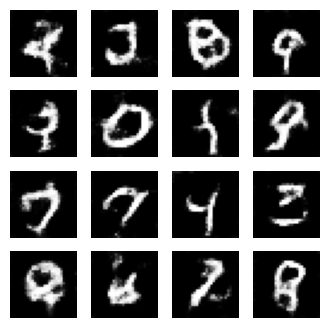

Epoch [2/30] Batch 0/938                       Loss D: -3.3260, loss G: -0.8189
Epoch [3/30] Batch 0/938                       Loss D: -2.3707, loss G: 0.9488
torch.Size([16, 1, 28, 28])


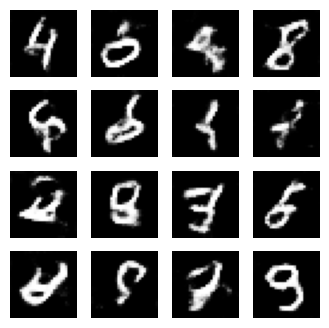

Epoch [4/30] Batch 0/938                       Loss D: -2.5039, loss G: 1.2661
Epoch [5/30] Batch 0/938                       Loss D: -2.4784, loss G: 3.7508
torch.Size([16, 1, 28, 28])


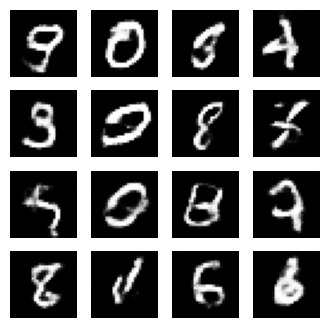

Epoch [6/30] Batch 0/938                       Loss D: -2.2624, loss G: 7.6948
Epoch [7/30] Batch 0/938                       Loss D: -2.1208, loss G: 10.2031
torch.Size([16, 1, 28, 28])


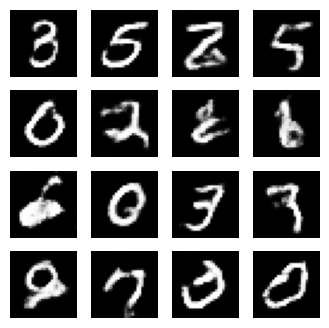

Epoch [8/30] Batch 0/938                       Loss D: -2.6984, loss G: 13.7462
Epoch [9/30] Batch 0/938                       Loss D: -2.4025, loss G: 15.2151
torch.Size([16, 1, 28, 28])


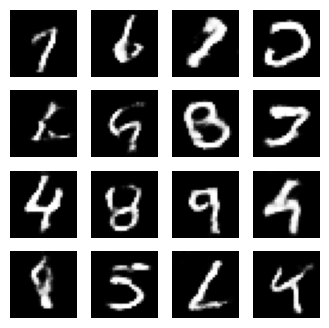

Epoch [10/30] Batch 0/938                       Loss D: -2.3720, loss G: 16.7588
Epoch [11/30] Batch 0/938                       Loss D: -1.9684, loss G: 18.0879
torch.Size([16, 1, 28, 28])


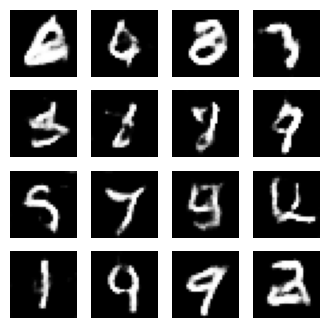

Epoch [12/30] Batch 0/938                       Loss D: -2.9885, loss G: 21.3662
Epoch [13/30] Batch 0/938                       Loss D: -2.6065, loss G: 21.2354
torch.Size([16, 1, 28, 28])


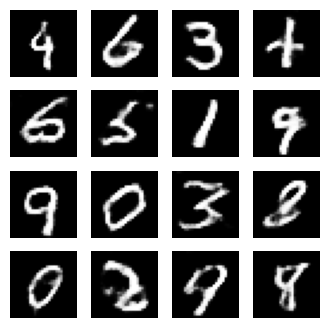

Epoch [14/30] Batch 0/938                       Loss D: -2.0118, loss G: 21.4793
Epoch [15/30] Batch 0/938                       Loss D: -2.4731, loss G: 23.0926
torch.Size([16, 1, 28, 28])


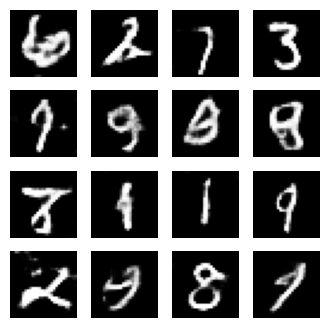

Epoch [16/30] Batch 0/938                       Loss D: -1.9593, loss G: 24.5150
Epoch [17/30] Batch 0/938                       Loss D: -1.9676, loss G: 23.4210
torch.Size([16, 1, 28, 28])


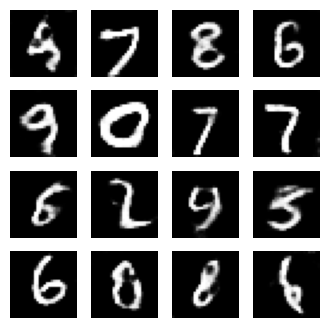

Epoch [18/30] Batch 0/938                       Loss D: -2.2370, loss G: 22.9857
Epoch [19/30] Batch 0/938                       Loss D: -1.9007, loss G: 24.2095
torch.Size([16, 1, 28, 28])


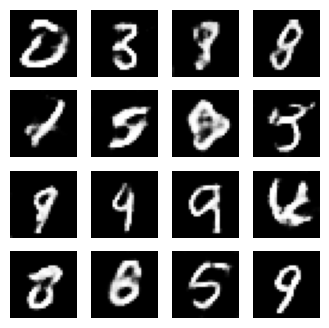

Epoch [20/30] Batch 0/938                       Loss D: -1.8340, loss G: 25.6299
Epoch [21/30] Batch 0/938                       Loss D: -1.8735, loss G: 26.8008
torch.Size([16, 1, 28, 28])


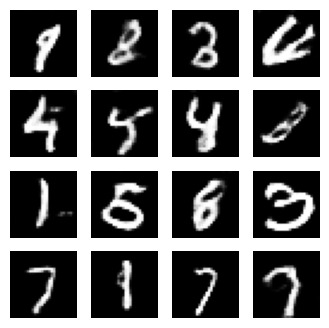

Epoch [22/30] Batch 0/938                       Loss D: -1.9818, loss G: 27.9710
Epoch [23/30] Batch 0/938                       Loss D: -1.8982, loss G: 30.5513
torch.Size([16, 1, 28, 28])


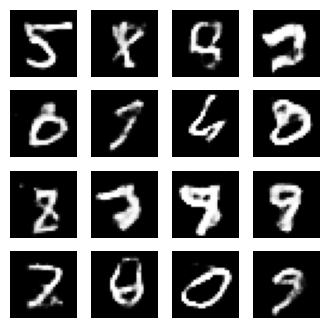

Epoch [24/30] Batch 0/938                       Loss D: -1.8221, loss G: 29.5287
Epoch [25/30] Batch 0/938                       Loss D: -1.7680, loss G: 30.4996
torch.Size([16, 1, 28, 28])


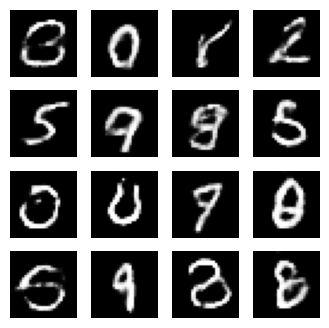

Epoch [26/30] Batch 0/938                       Loss D: -1.9620, loss G: 30.1034
Epoch [27/30] Batch 0/938                       Loss D: -1.7175, loss G: 30.2518
torch.Size([16, 1, 28, 28])


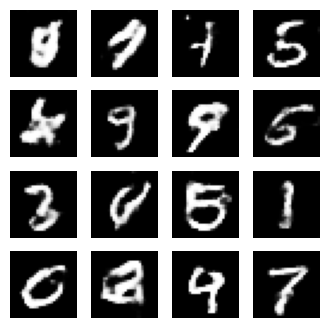

Epoch [28/30] Batch 0/938                       Loss D: -1.9402, loss G: 31.2949
Epoch [29/30] Batch 0/938                       Loss D: -1.9905, loss G: 32.9554
torch.Size([16, 1, 28, 28])


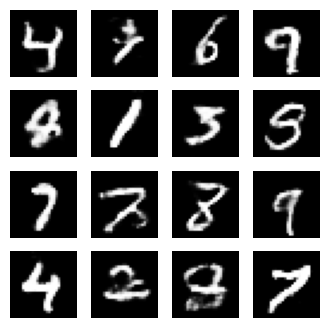

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.datasets as datasets
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torch.utils.tensorboard import SummaryWriter

class Critic(nn.Module):
    def __init__(self, img_dim):
        super().__init__()
        self.critic = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1),
            nn.InstanceNorm2d(64, affine=True),
            nn.LeakyReLU(0.1),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.1),
            nn.Flatten(),
            nn.Linear(128*7*7, 1),
            #nn.Conv2d(128, 1, kernel_size=8, stride=1, padding=1),
        )
    def forward(self, x):
        #print("After convolutions shape:", x.shape)
        #x = x.view(x.size(0), -1)
        #print("After flatten shape:", x.shape)
        return self.critic(x)

class Generator(nn.Module):
    def __init__(self, z_dim, img_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(z_dim, 128*7*7),
            nn.Unflatten(1, (128, 7, 7)),  # Reshape to (batch_size, 256, 7, 7)
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.1),  # Add activation function if needed
            nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),  # Assuming you want to generate images with pixel values in the range [-1, 1]
        )
    def forward(self, x):
        return self.gen(x)

#class WeightClipper(object):
#
#    def __call__(self, module):
#        # filter the variables to get the ones you want
#        if hasattr(module, 'weight'):
#            w = module.weight.data
#            w = w.clamp(-0.01, 0.01)
#            module.weight.data = w


#Hyperparameters etc
device = "cuda" if torch.cuda.is_available() else "cpu"
lr = 0.0001
z_dim = 100
image_dim = 28 * 28 * 1
num_epochs = 30
batch_size = 64
LAMBDA_GP = 10
#CLIP_THRESHOLD = 0.01
critic = Critic(image_dim).to(device)
gen = Generator(z_dim, image_dim).to(device)
fixed_noise = torch.randn((batch_size, z_dim)).to(device)
transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

#clipper = WeightClipper()

class WassersteinLoss(nn.Module):
    def __init__(self):
        super(WassersteinLoss, self).__init__()

    def forward(self, inputs, targets):
        loss = inputs * targets
        return -loss.mean()

dataset = datasets.MNIST(root="dataset/", transform=transforms, download=True)
loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
opt_critic = optim.Adam(critic.parameters(),lr=lr, betas=(0.0, 0.9))
opt_gen = optim.Adam(gen.parameters(), lr=lr, betas=(0.0, 0.9))
criterion = WassersteinLoss()
writer_fake = SummaryWriter(f"runs/GAN_MNIST/fake")
writer_real = SummaryWriter(f"runs/GAN_MNIST/real")
step = 0


import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def sample_images(epoch, image_grid_rows=4, image_grid_columns=4):

  # Sample random noise
  #z = np.random.normal(0, 1, (28 * 28, z_dim))
  noise = torch.randn(16, z_dim).to(device)

  # Generate images from random noise
  #noise = torch.randn(batch_size, z_dim)
  gen_imgs_cuda = gen(noise)
  print(gen_imgs_cuda.shape)
  gen_imgs = gen_imgs_cuda.cpu().detach().numpy()
  gen_imgs = gen_imgs.reshape((16,28,28,1))

  # Rescale image pixel values to [0, 1]
  gen_imgs = 0.5 * gen_imgs + 0.5

  # Set image grid
  fig, axs = plt.subplots(image_grid_rows,
                          image_grid_columns,
                          figsize=(4, 4),
                          sharey=True,
                          sharex=True)

  cnt = 0
  for i in range(image_grid_rows):
      for j in range(image_grid_columns):
        img = gen_imgs[cnt,:,:,:]
        # Output a grid of images
        axs[i, j].imshow(gen_imgs[cnt], cmap='gray')
        axs[i, j].axis('off')
        cnt += 1
  plt.savefig(f'samples of epoch {epoch}.png')
  plt.show()

def gradient_penalty(critic, real, fake, device="cpu"):
    BATCH_SIZE, C, H, W = real.shape
    epsilon = torch.rand((BATCH_SIZE, 1, 1 ,1)).repeat(1, C, H, W).to(device)
    interpolated_images = real * epsilon + fake * (1 - epsilon)

    #calculate critic score
    mixed_scores = critic(interpolated_images)
    gradient = torch.autograd.grad(
        inputs=interpolated_images,
        outputs=mixed_scores,
        grad_outputs=torch.ones_like(mixed_scores),
        create_graph=True,
        retain_graph=True,
    )[0]

    gradient = gradient.view(gradient.shape[0],-1)
    gradient_norm = gradient.norm(2, dim=1)
    gradient_penalty = torch.mean((gradient_norm - 1) ** 2)
    return gradient_penalty

for epoch in range(num_epochs):
    for batch_idx, (real, _) in enumerate(loader):
        real = real.view(-1, 1, 28, 28).to(device)
        #print(real.shape)
        #print("Real shape:", real.shape)
        batch_size = real.shape[0]
        for i in range(5):
          #train discriminator max log(D(real)) + log(1-D(G(z)))
          noise = torch.randn(batch_size, z_dim).to(device)
          fake = gen(noise)
          critic_real = critic(real).view(-1)
          #print("Discriminator output shape:", disc_real.shape)
          lossC_real = criterion(critic_real, torch.ones_like(critic_real))
          critic_fake = critic(fake).view(-1)
          lossC_fake = criterion(critic_fake, -torch.ones_like(critic_fake))
          gp = gradient_penalty(critic, real, fake, device=device)
          lossC = (lossC_fake + lossC_real) + LAMBDA_GP*gp
          critic.zero_grad()
          lossC.backward(retain_graph=True)
          opt_critic.step()
          #critic.apply(clipper)


        #train Generator min log(1-D(G(z))) ->max log(D(G(z)))
        output = critic(fake).view(-1)
        lossG = criterion(output, torch.ones_like(output))
        gen.zero_grad()
        lossG.backward()
        opt_gen.step()
        if batch_idx == 0:
            print(
                f"Epoch [{epoch}/{num_epochs}] Batch {batch_idx}/{len(loader)} \
                      Loss D: {lossC:.4f}, loss G: {lossG:.4f}"
            )

            with torch.no_grad():
                fake = gen(fixed_noise).reshape(-1, 1, 28, 28)
                data = real.reshape(-1, 1, 28, 28)
                img_grid_fake = torchvision.utils.make_grid(fake, normalize=True)
                img_grid_real = torchvision.utils.make_grid(data, normalize=True)

                writer_fake.add_image(
                    "Mnist Fake Images", img_grid_fake, global_step=step
                )
                writer_real.add_image(
                    "Mnist Real Images", img_grid_real, global_step=step
                )
                step += 1
    if (epoch + 1) % 2 == 0:
      sample_images(epoch=epoch+1)